<a href="https://colab.research.google.com/github/datasciencefefu/course/blob/main/03_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация данных


Одним из самых творческих этапов в работе с данными является этап **визуализации**. Использование графиков и диаграмм позволяет более наглядно представить данные и продемонстрирововать полученные результаты их анализа.

В области машинного обучения визуализация данных - это не просто создание причудливой графики для отчетов. Визуализация используется в повседневной работе на всех этапах работы над проектом.

Начнем с того, что визуальное исследование данных - это первое, что обычно делают при работе с новой задачей. Аналитики проводят предварительные проверки и анализ с использованием графиков и таблиц, чтобы обобщить данные и упустить менее важные детали. Людям гораздо удобнее понять основные моменты таким образом, чем читать множество строк необработанных данных. Удивительно, как много понимания можно получить из, казалось бы, простых диаграмм, созданных с помощью доступных инструментов визуализации.

При анализе производительности модели или результатов отчета аналитики также часто используют диаграммы и изображения. Иногда для интерпретации сложной модели необходимо проецировать многомерные пространства на более визуально понятные 2D или 3D-фигуры.

В общем, визуализация - это относительно быстрый способ узнать что-то новое об имеющихся данных. Таким образом, жизненно важно изучить его наиболее полезные методы и сделать их частью своего повседневного набора инструментов машинного обучения.

В этом разделе будут рассмотрены некоторые примеры визуального исследования данных с использованием популярных библиотек, таких как Pandas, Matplotlib, Seaborn и Plotly.

### Pandas


Для визуализации результатов анализа удобно использовать библиотеку **Pandas**. Возможностей Pandas хватит, чтобы построить основные типы графиков и диаграмм.


Будем рассматривать визуализацию на данных встроенного датасета tips — он содержит информацию о посещениях ресторана и оставленных чаевых.
В датасете семь признаков:
-	total_bill — общая сумма счета;
-	tip — размер чаевых;
-	sex — пол клиента;
-	smoker — является ли клиент курящим;
-	day — день недели;
-	time — время (обед или ужин);
-	size — количество посетителей, обедавших за столом.


In [ ]:
import seaborn as sns

data = sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Основным методом для быстрого создания графиков и диаграмм в Pandas является метод **plot()**:

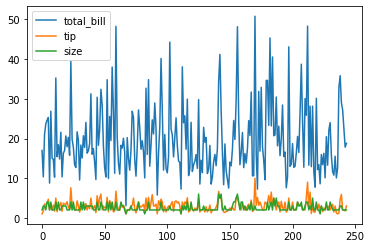

In [ ]:
data.plot()

Если обратиться к методу plot() без указания параметров, то получится график для всех количественных признаков в датафрейме (см. Категориальные и количественные, непрерывные и дискретные переменные). 

По умолчанию на графике, созданном методом plot(), по оси х отложены порядковые номера данных в датафрейме (индексы), а по оси y — значения признаков.

#### Отображение нескольких графиков

В методе plot() есть ещё один полезный параметр subplots, который поможет разместить несколько графиков в одной рабочей области. Параметр принимает логические значения True или False. Если установим значение True, то разместим сразу два графика для признаков из нашего датафрейма:


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c301addd0>,
      dtype=object)

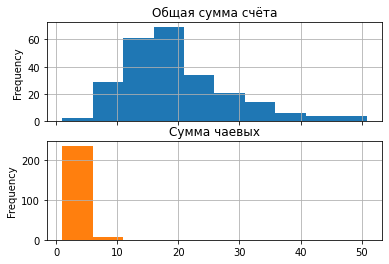

In [ ]:
data[['total_bill', 'tip']].plot(kind='hist',
                                 grid=True,
                                 subplots=True,
                                 title=['Общая сумма счёта', 'Сумма чаевых'],
                                 legend=False)

## Matplotlib

Для продвинутой работы с графиками (в том числе гистограммами), импортируют библиотеку matplotlib (от англ. math — «математический», plot — «график, диаграмма», library — «библиотека»). Matplotlib — это популярная профессиональная библиотека для создания графиков и изображений. Нам понадобится модуль pyplot, он содержит функции и методы для визуализации данных: 

In [ ]:
import matplotlib.pyplot as plt

При визуализации данных с помощью matplotlib рекомендуется использовать объектно-ориентированный подход. Его суть заключается в создании объектов, характеристики которых можно легко изменять, этот подход позволяет создавать объекты-контейнеры. Такой контейнер может содержать другие объекты, например, координатную плоскость или графики. Удобно, что такие объекты можно легко изменять и настраивать независимо друг от друга.

Посмотрим на примерах, как работает ООП в визуализации. Создадим объект с именем fig (фигура) — это контейнер для будущего графика:

In [ ]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Добавим в объект fig новый объект - одну координатную плоскость. Она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает отведенное место в объекте fig (ширина и высота равны 1). В созданной координатной плоскости можно разместить любую графическую информацию. Поместим туда гистограмму с помощью метода hist():

In [ ]:
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data['total_bill'])

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

У метода hist() есть параметры color и bins: с их помощью можем поменять цвет диаграммы и увеличить количество столбцов для демонстрации распределения. Такие возможности отличают визуализацию в Matplotlib от построения графиков Pandas. В Matplotlib создается объект-холст и все графики строятся внутри него. В Pandas нет такой гибкости, там возможно строить графики сразу - без создания дополнительных объектов. 


Text(0.5, 1.0, 'Общая сумма счета')

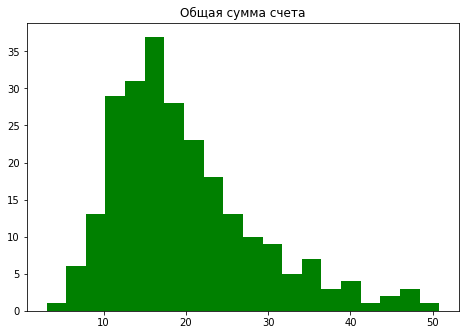

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')

Можем попробовать нарисовать графики и других видов, применив к объекту axes другие методы. Например, создадим диаграмму рассеяния (**scatter plot**). 

**Диаграмма рассеяния** показывает распределение элементов множества в плоскости между двумя переменными. Один признак откладывается по оси x, а второй признак — по оси y. Для этого воспользуемся методом scatter():


Text(0.5, 1.0, 'Общая сумма счёта Vs Cумма чаевых')

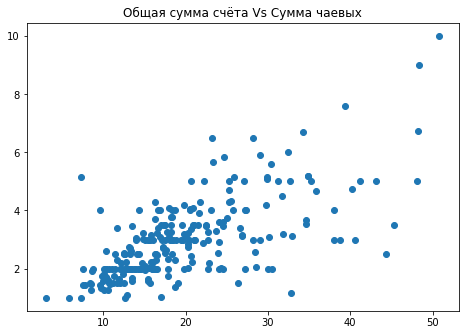

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=data['total_bill'], y=data['tip'], marker='o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')

Диаграмма рассеяния показывает как между собой могут быть связаны сумма счёта и размер чаевых. Каждая точка на графике — это один столик в ресторане. По графику видно, что чем выше сумма чека, тем выше чаевые, однако зависимость может быть обманчивой. Если просто смотреть на таблицу с данными, то заметить такую связь очень сложно. Особенно, если у тебя пока нет большого опыта работы с данными.

### Добавление легенды графика

При отображении на графике нескольких столбцов датасета необходимо добавить пояснения,
какой информации соответствует тот или иной цвет. Такие комментарии называют легендой.
Чтобы создать её, используем метод legend() для объекта axes. Легенду можно поместить в
разных местах на координатной плоскости, поэтому специальным параметром loc зададим
место её размещения на графике: 

`axes.legend(loc = 1)`

Если легенда перекрывает часть данных, то можно увеличить максимальное значение оси ординат (ось y) с помощью метода set_ylim() к объекту axes:

In [ ]:
axes.set_ylim(0, 60)

(0.0, 60.0)

### Создание нескольких графиков

В одном пространстве (объекте fig) можно разместить сразу несколько графиков методом subplots(). Посмотрим, как использовать метод при визуализации в ООП. В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. Можно  даже задать размер фигуры в дюймах (ширина*высота, 1 дюйм = 2,54 см): `fig, axes = plt.subplots(1, 3, figsize = (12,4))`.

После выполнения кода переменная fig содержит общий объект, а переменная axes содержит список, состоящий из трех внутренних объектов. Обращаться к элементам получившегося списка можно по индексам (от 0 до 2):

Text(0.5, 1.0, 'Общая сумма счета Vs сумма чаевых')

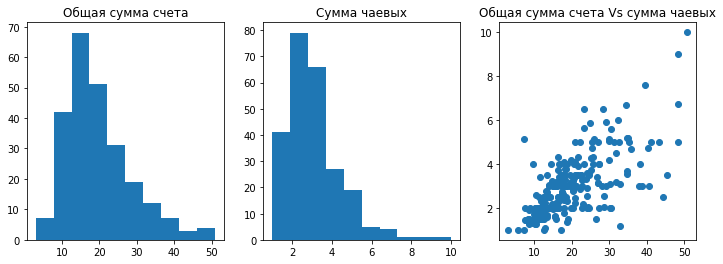

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  
# В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики
axes[0].hist(data.total_bill)
axes[0].set_title('Общая сумма счета')
axes[1].hist(data.tip)
axes[1].set_title('Сумма чаевых')
axes[2].scatter(x=data.total_bill, y=data.tip, marker='o')
axes[2].set_title('Общая сумма счета Vs сумма чаевых')

## Seaborn

Для создания визуализаций со сложными настройками параметров отображения данных используется библиотека **Seaborn**. 

Seaborn — графическая многофункциональная библиотека, которая написана на основе Matplotlib. Импорт библиотеки Seaborn был сделан еще в самом начале при загрузке датасета tips.


Перед созданием гистограммы установим стандартные параметры отображения графиков с помощью команды sns.set():

In [ ]:
sns.set()

В библиотеке Seaborn название методов для создания уже знакомых диаграмм будут отличаться. Самый простой график, показывающий линию вдоль двухмерной плоскости и используется для просмотра корреляции между двумя величинами -  **lmplot**. Seaborn позволяет установить высоту, цветовую палитру для создаваемого графика.

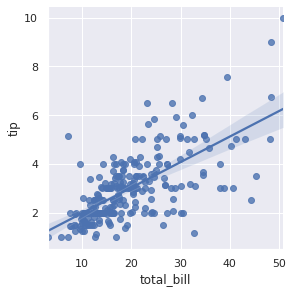

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=data, height=4, palette="dark")

График оценки плотности ядра - Kernel Density Estimate (KDE) - является сглаженной непрерывной версией гистограммы и используется для визуализации распределения вероятности одномерных данных. 

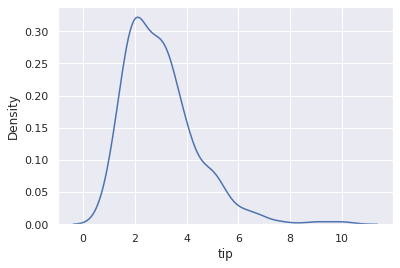

In [ ]:
sns.kdeplot(data['tip'])

Чтобы построить несколько распределений одним вызовом функции используется метод **distplot()** - комбинация kdeplot и гистограмм. В результате мы получим график плотности поверх соответствующей гистограммы. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


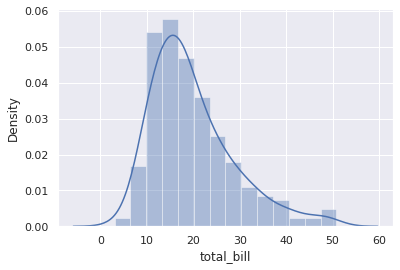

In [ ]:
sns.distplot(data.total_bill)

Seaborn позволит нам разместить на одном графике гистограммы распределения двух признаков и показать связь между ними, то есть можно построить две гистограммы для двух признаков (общий счёт заказа, сумма чаевых) и связывающую их диаграмму рассеяния. Используем метод **jointplot()**, чтобы нарисовать нужную визуализацию:

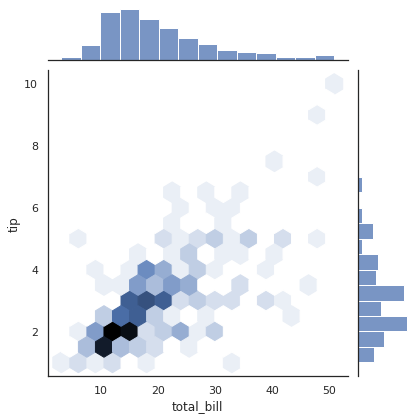

In [ ]:
with sns.axes_style('white'):
  sns.jointplot(x='total_bill', y='tip', data=data, kind='hex')

График построили, посмотрим, какие параметры можно отрегулировать. Для начала изменим характер представления информации в центральной части графика — сделаем это с помощью параметра kind. Добавим на график линию тренда:

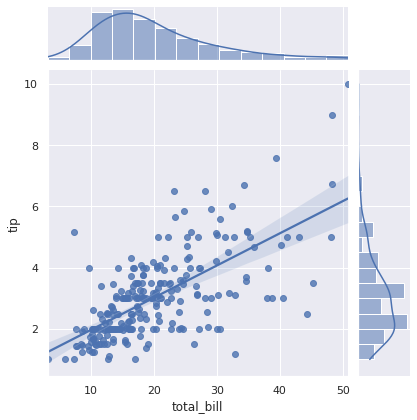

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=data, kind='reg')

Ещё один способ отобразить визуализировать распределение признаков в датасете — построить график, который будет показывать отношения сразу между всеми парами переменных. Где-то это будет гистограмма, а где-то точечная диаграмма рассеяния. График строится методом **pairplot()**:

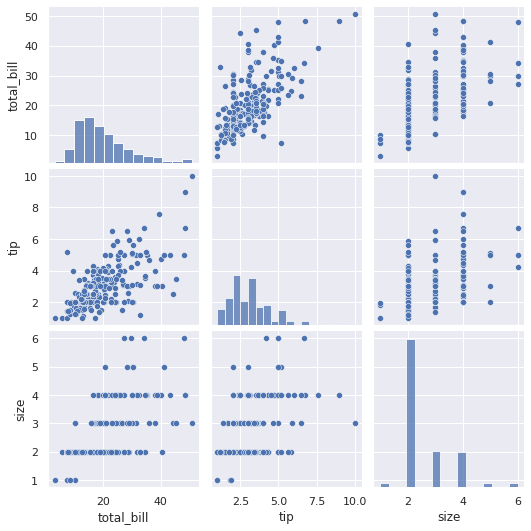

In [ ]:
sns.pairplot(data)

Для отображения корреляции различных числовых атрибутов в наборе данных удобно использовать **тепловые карты** (heatmap). 
Для создания тепловой карты создадим матрицу корреляции и передадим ее в параметр тепловой карты. Для отображения подписей установим значение параметра аннотации True.

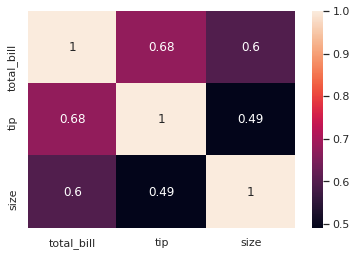

In [ ]:
sns.heatmap(data.corr(), annot=True)

При визуализации информации о категориальных (качественных) признаках методами библиотек Pandas и Matplotlib приходится предварительно обрабатывать датафрейм и группировать нужные данные.
В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными признаками напрямую. Для построения гистограммы распределения категориального признака можно воспользоваться методом **countplot()**:


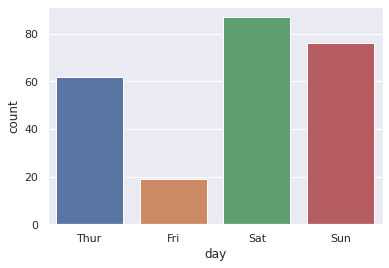

In [ ]:
sns.countplot(x='day', data=data)

Категориальные значения при построении графиков можно использовать в качестве одного из параметров метода **barplot()**. Он сам сгруппирует данные  в зависимости от значения категориальной переменной. По умолчанию для каждой группы вычисляется среднее  арифметическое значение заданной количественной переменной (вместо среднего значения можно вычислить и любой другой показатель — настроить это можно в параметре **estimator**). При необходимости гистограммы можно строить как по горизонтали, так и по вертикали.

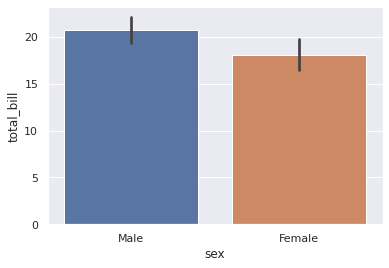

In [ ]:
sns.barplot(x='sex', y='total_bill', data=data)

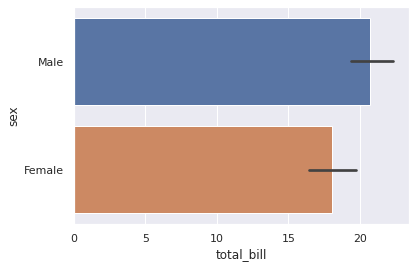

In [ ]:
ax = sns.barplot(x='total_bill', y='sex', data=data)

График показывает сравнение среднего чека у мужчин и женщин: в среднем гости-мужчины оставляли в ресторане больше денег, чем женщины.

Теперь посмотрим как зависит сумма, которую персонал ресторана получает в виде чаевых, от различных переменных. Проще всего это сделать используя гистограммы подмножеств **FacetGrid**:

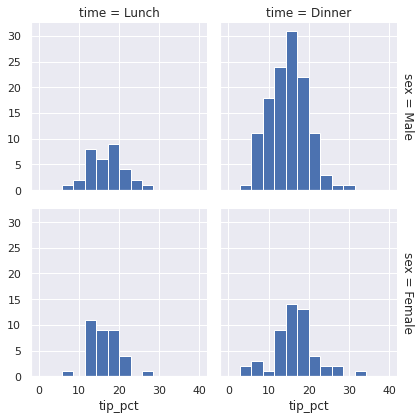

In [ ]:
import numpy as np

data['tip_pct'] = 100 * data['tip'] / data['total_bill']
grid = sns.FacetGrid(data, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## Plotly

Ещё один интересный продукт, с помощью которого можно создавать интерактивные графики и диаграммы — библиотека Plotly. Это коммерческий продукт, но многие функции доступны для бесплатного использования.

Библиотека Plotly будет полезна, чтобы
-	получать отдельное значение признака в интерактивном режиме;
-	регулировать отображение признаков (отключать и включать признаки на графике);
-	увеличивать фрагмент графика;
-	сохранить график как изображение в формате PNG.




Большой популярностью среди аналитиков пользуется модуль Plotly Express. Plotly Express – это высокоуровневый API для визуализации данных. С помощью него можно упростить и ускорить создание графических объектов вызовом соответствующих функций.  Plotly Express поддерживает широкий спектр диаграмм, включая многомерные отображения, матрицы рассеяния (SPLOM), графики параллельных координат и параллельных категорий.

С помощью Plotly Express можно добавить интерактивность базовым графикам **bar**.

In [ ]:
import plotly.express as px

fig = px.bar(data, x="sex", y="total_bill", color="smoker", barmode="group", facet_row="time", 
             facet_col="day", category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], 
                                               "time": ["Lunch", "Dinner"]})
fig.show()

Используя данный модуль можно отобразить на одном графике несколько гистограмм для различных значений одного столбца. А с помощью ключевого слова marginal рядом с гистограммой рисуется подзаголовок, визуализирующий распределение. 

In [ ]:
fig = px.histogram(data, x="total_bill", color="sex", marginal="box",
                         hover_data=data.columns)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/express/_core.py:283: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Для визуализации взаимосвязи между несколькими наборами категорий в наборе данных удобно использовать такой инструмент как **параллельные категории**.

In [ ]:
fig = px.parallel_categories(data, color="size", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

В модуле Plotly Graph Objects есть специальные объекты под названием graph objects (графические объекты). Один из примеров 3D-диаграмм с выбором опций есть на сайте plotly:

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Surface(z=df.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Trace type:", showarrow=False,
             x=0, y=1.08, yref="paper", align="left")
    ]
)

fig.show()